

---


#APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis
      2. Bi-Varient Analysis
      3. Multi-Varient Analysis
          1. Regression Problem
          2. Apply Machine Learing Models
          3. Compare and bring out the best Model
       




# IMPORTING LIBRARIES
---




In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dte
from math import sqrt,radians,cos,sin,asin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
import warnings
warnings.filterwarnings('ignore')






# READING AND AUDITING DATASET
---

In [55]:
df = pd.read_csv('/content/NYCTaxiFares.csv')

In [56]:
df.head(6)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
5,2010-04-22 08:39:47 UTC,8.1,0,-73.980481,40.748995,-73.983508,40.766459,1


In [57]:
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 120000
No of Columns: 8


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB




> **INFERENCE:**



*   There's only one categorical and rest of the columns are numerical

*   Looks there is no missing data.







In [59]:
# To check missing values
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64



> **INFERENCE:**

There is no missing values.



In [60]:
#Checking for duplicate values
df.duplicated().sum()

0



> **INFERENCE:**

There is no duplicate values.



In [61]:
# Uni-varient Analysis

df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


# FEATURE ENGINEERING

---



In [62]:
# Changing the datatype of the 'pickup_datetime' column

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [63]:
# Checking datatype
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [64]:
df.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03+00:00,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48+00:00,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40+00:00,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44+00:00,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14+00:00,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


## <h3> Calculating distance from Longitude and latitude </h3>
---



<h4> Using the  Haversine formula ,</h4>

    a = sin²(Δlat/2) + cos(lat1) * cos(lat2) * sin²(Δlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c


In [65]:
def distance(long1,long2,lat1,lat2):
  # Converting the given lat and long from degree to radians using radians python inbuilt function
  long1 = radians(long1)
  long2 = radians(long2)
  lat1 = radians(lat1)
  lat2 = radians(lat2)

  # Calculating the differences in lat and long
  dlo = long2-long1
  dla = lat2-lat1

  # Applying formula
  a = sin(dla/2)**2+cos(lat1)*cos(lat2)*sin(dlo/2)**2
  c = 2 * asin(sqrt(a))

  # Value of Radius in 'km'
  R = 6371
  return(round(c*R,2))

# Storing the distance
dist=[]
for i in range(df.shape[0]):
    dist.append(distance(df['pickup_latitude'][i],
                df['dropoff_latitude'][i],
                df['pickup_longitude'][i],
                df['dropoff_longitude'][i]))

In [66]:
# Adding a new distance column to the data

df['Distance in kms'] = dist

In [67]:
# Checking the columns

df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Distance in kms'],
      dtype='object')

In [68]:
# Dropping unwanted columns

df.drop(['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],inplace = True,axis = 1)



> **INFERENCE:**


As we have calculated the distances we no longer require the pickup and dropoff's latitude and longitude hence, we can drop it.

In [69]:
df.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,Distance in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


In [70]:
# Creating dictonary for days in a week

week = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}

# Extracting the weeks day

df['Days']=df['pickup_datetime'].dt.weekday.map(week)

In [71]:
df.head(5)

,pickup_datetime,fare_amount,fare_class,passenger_count,Distance in kms,Days
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday



# VISUALISATION

---



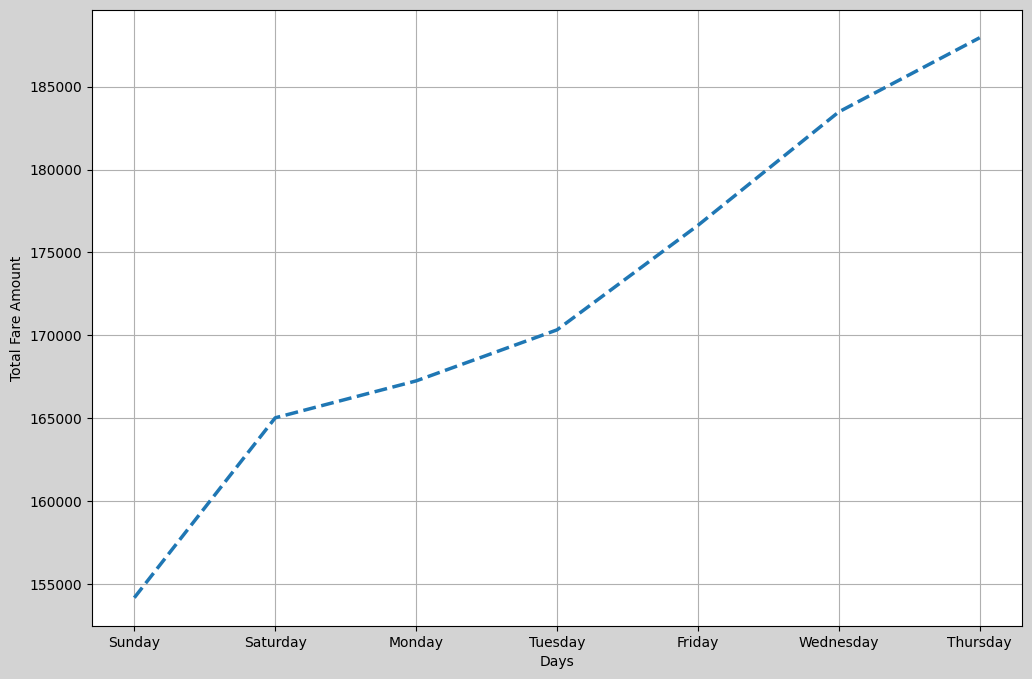

In [72]:
# Visualising the day which has highest fare amount

# Create a figure and set its background color
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('lightgrey')

df.groupby('Days')['fare_amount'].sum().sort_values().plot(kind='line',linestyle='--', linewidth=2.5)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Total Fare Amount')
plt.show()



> **INFERENCE:**

On Thursdays, Fare Amount collected is higher than the rest of the days in a week.



In [73]:
# Encoding the days based on the plot

week_encoded={"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [74]:
# Updated 'Days' column

df['Days']=df['Days'].map(week_encoded)
df['Days'].head()

0    1
1    5
2    5
3    2
4    5
Name: Days, dtype: int64

In [75]:
# Extracting the hours

df['Hour']=df['pickup_datetime'].dt.hour
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'passenger_count',
       'Distance in kms', 'Days', 'Hour'],
      dtype='object')

In [76]:
# Extracting the months

df['Month']=df['pickup_datetime'].dt.day
df['Month'].head()

0    19
1    17
2    17
3    11
4    17
Name: Month, dtype: int64

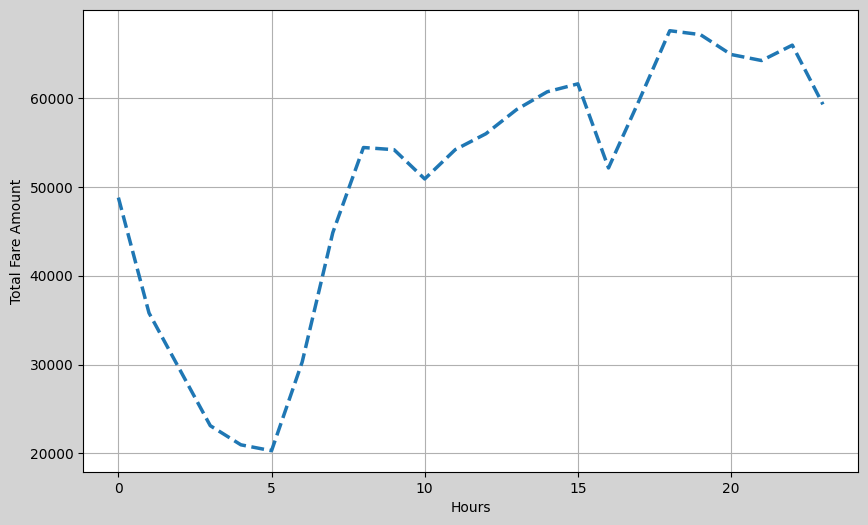

In [77]:
# Visualising the day which has highest fare amount

# Create a figure and set its background color
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')

df.groupby('Hour')['fare_amount'].sum().plot(kind='line',linestyle='--', linewidth=2.5)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Total Fare Amount')
plt.show()




>  **INFERENCE:**


At 6:00pm UTC, The total fare amount collected is highest.

In [78]:
# Extracting unqiue dates and fare amount collected on those dates

date=[]
fare=[]
for day in list(df['pickup_datetime'].dt.day.sort_values().unique()):
    date.append('Date:'+str(day))
    fare.append(df[df.pickup_datetime.dt.day==day].fare_amount.sum())

In [79]:
print('No of Unique Dates :',len(date))

No of Unique Dates : 15


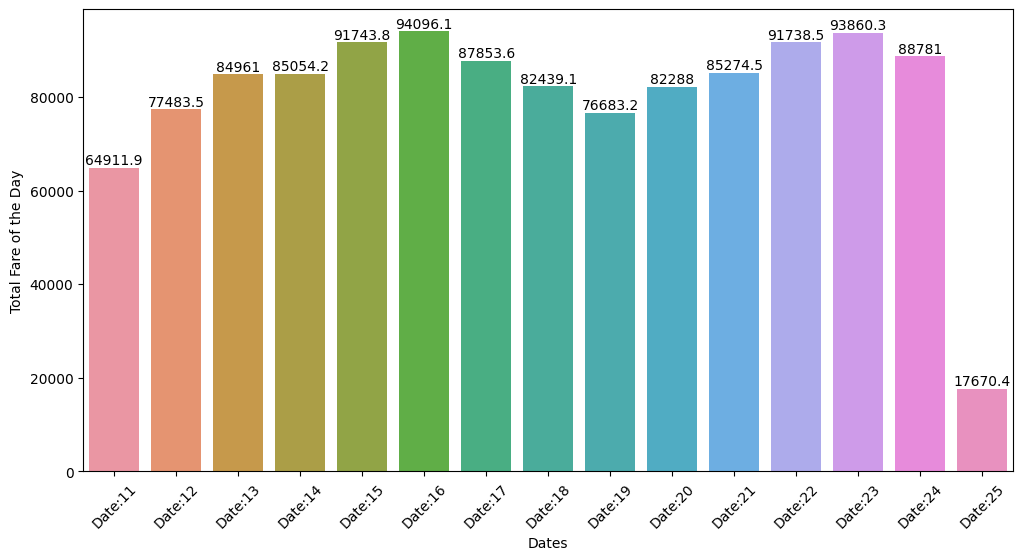

In [80]:
 # Visualising the dates which has highest fare amount

plt.figure(figsize=(12, 6))
ax = sns.barplot(x= date, y= fare)
plt.xlabel('Dates')
plt.ylabel('Total Fare of the Day')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()




>  **INFERENCE:**




The Highest fare is 94096 which was collected on 16th of that month

<Axes: xlabel='fare_class'>

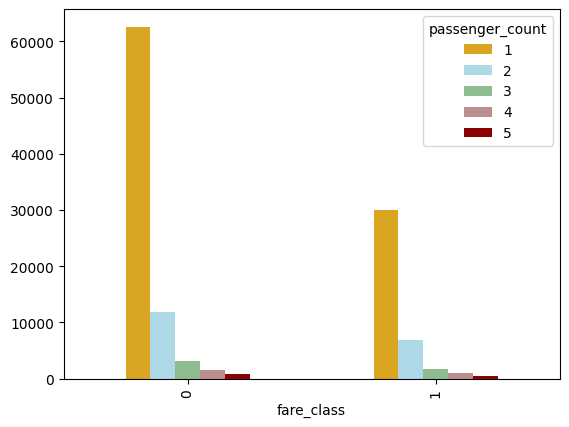

In [81]:
# Visualising the fare class vs passenger count

custom_colors = ['goldenrod', 'lightblue','darkseagreen', 'rosybrown','darkred']
pd.crosstab(df['fare_class'],df['passenger_count']).plot(kind='bar',color=custom_colors)




>  **INFERENCE:**

The most commonly requested class for rides was Class 0, and the majority of the rides were single rider trips.


<Figure size 1200x600 with 0 Axes>

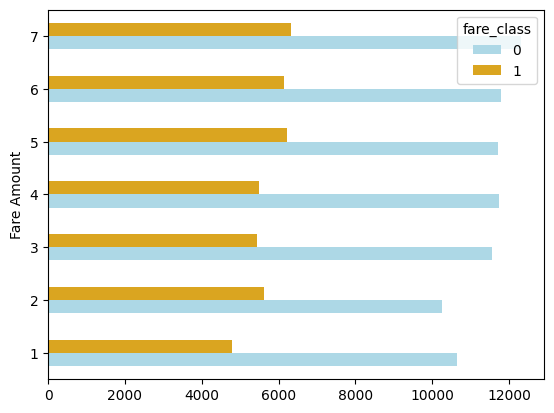

In [82]:
# Visualising the fare class vs Days of the taxi ride

plt.figure(figsize=(12, 6))
custom_colors = ['lightblue', 'goldenrod']

ax = pd.crosstab(df['Days'],df['fare_class']).plot(kind='barh',ylabel='Fare Amount',color=custom_colors)
plt.show()



>  **INFERENCE:**


Highest fare amount of both fare class was collected on Thursday

<Axes: ylabel='fare_amount'>

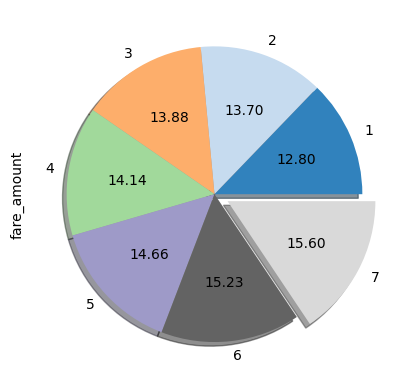

In [83]:
colormap = plt.cm.tab20c
df.groupby('Days')['fare_amount'].sum().plot(kind='pie',autopct='%.2f',explode=[0,0,0,0,0,0,0.1],shadow=True,colormap=colormap)

<Axes: xlabel='Hour', ylabel='No. of Rides booked'>

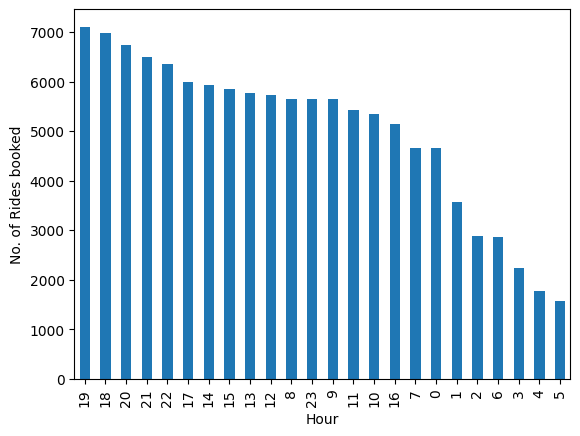

In [84]:
# Visualising the Hours and No.of rides booked

df['Hour'].value_counts().plot(kind='bar',xlabel='Hour',ylabel='No. of Rides booked')



> **INFERENCE:**


The highest number of rides recorded at 7:00 PM.

<Axes: xlabel='Hour', ylabel='Total fare collected'>

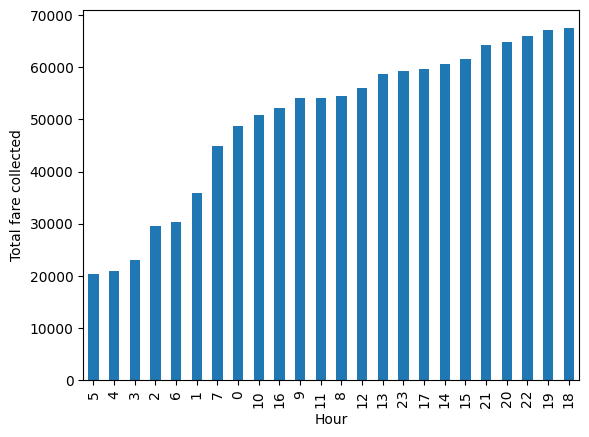

In [85]:
# Visualising the fare amount with the Hours of taxi ride

df.groupby('Hour')['fare_amount'].sum().sort_values().plot(kind='bar',ylabel='Total fare collected')



> **INFERENCE:**


At 6 PM, The total fare collected is highest.

# SPLIT THE TRAIN AND TEST DATA

---



In [86]:
# Dropping unwanted columns for prediction

df.drop('pickup_datetime',axis=1,inplace=True)

In [87]:
x = df.drop(['fare_amount'],axis=1)
y = df['fare_amount']

In [88]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [89]:
# User-defined function for evaluation metrics

def reg_metrics(actual,pred):
    r2=r2_score(actual,pred)
    mse=mean_squared_error(actual,pred)
    mae=mean_absolute_error(actual,pred)
    rmse=mean_squared_error(actual,pred,squared=False)
    print('R^2 Error : ',round(r2,4))
    print('MSE  : ',round(mse,4))
    print('MAE  : ',round(mae,4))
    print('RMSE : ',round(rmse,4),'\n')






# BUIDLING MODEL

---




## Linear Regression

---



In [90]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

train_lr=lr.predict(xtrain)
test_lr=lr.predict(xtest)

reg_metrics(ytrain,train_lr)
reg_metrics(ytest,test_lr)

R^2 Error :  0.8076
MSE  :  10.8325
MAE  :  1.9333
RMSE :  3.2913 

R^2 Error :  0.8125
MSE  :  10.5047
MAE  :  1.9111
RMSE :  3.2411 



## Decision Tree

---



In [91]:
dt=DecisionTreeRegressor(max_depth=19,min_samples_leaf= 19,min_samples_split= 7)
dt.fit(xtrain,ytrain)

train_dt=dt.predict(xtrain)
test_dt=dt.predict(xtest)

reg_metrics(ytrain,train_dt)
reg_metrics(ytest,test_dt)

R^2 Error :  0.8571
MSE  :  8.0459
MAE  :  1.6973
RMSE :  2.8365 

R^2 Error :  0.8341
MSE  :  9.2948
MAE  :  1.8433
RMSE :  3.0487 



## Random Forest

---



In [92]:
rf=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=19,min_samples_leaf=17)
rf.fit(xtrain,ytrain)

train_rf=rf.predict(xtrain)
test_rf=rf.predict(xtest)

reg_metrics(ytrain,train_rf)
reg_metrics(ytest,test_rf)

R^2 Error :  0.8599
MSE  :  7.8894
MAE  :  1.6798
RMSE :  2.8088 

R^2 Error :  0.8454
MSE  :  8.6604
MAE  :  1.7803
RMSE :  2.9428 



## AdaBoost

---



In [93]:
ada=AdaBoostRegressor(learning_rate=0.01)
ada.fit(xtrain,ytrain)

train_ada=ada.predict(xtrain)
test_ada=ada.predict(xtest)

reg_metrics(ytrain,train_ada)
reg_metrics(ytest,test_ada)

R^2 Error :  0.8223
MSE  :  10.0079
MAE  :  1.964
RMSE :  3.1635 

R^2 Error :  0.8274
MSE  :  9.6668
MAE  :  1.9548
RMSE :  3.1091 



## Gradient Boost

---



In [94]:
gb=GradientBoostingRegressor(n_estimators=200,max_depth=6,min_samples_split=13,min_samples_leaf=14)
gb.fit(xtrain,ytrain)

train_gb=gb.predict(xtrain)
test_gb=gb.predict(xtest)

reg_metrics(ytrain,train_gb)
reg_metrics(ytest,test_gb)

R^2 Error :  0.8534
MSE  :  8.2572
MAE  :  1.7452
RMSE :  2.8735 

R^2 Error :  0.8472
MSE  :  8.5596
MAE  :  1.7706
RMSE :  2.9257 



In [95]:
# Plotting the scores of all models

acc=pd.DataFrame({'models':['Linear Reg','Dtree','Random forest','AdaBoost','Gradient Boost'],
                  'r2':[round(r2_score(ytest,test_lr),2),round(r2_score(ytest,test_dt),2),round(r2_score(ytest,test_rf),2),round(r2_score(ytest,test_ada),2),round(r2_score(ytest,test_gb),2)]})
acc.sort_values(inplace=True,by='r2')

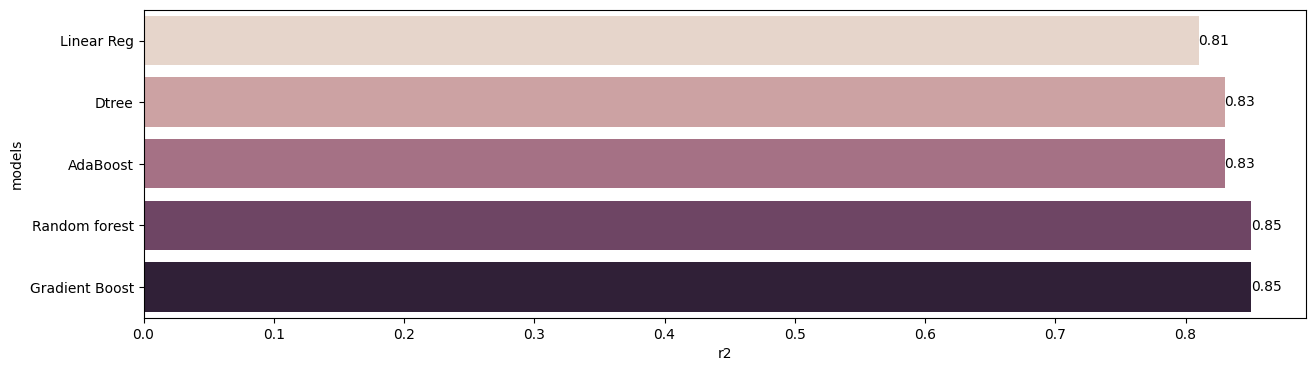

In [96]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='r2',y='models',data=acc,palette='ch:.120')
ax.bar_label(ax.containers[0])
plt.show()

Both Gradient Boost and Random forest works well

# DEPLOYMENT

---



In [97]:
from geopandas.tools import geocode

In [98]:
# Finding latitude and longitude from location entered by user

def lon_lat(pickup,drop):
    pick = geocode(pickup)
    drp = geocode(drop)

    pick_point = pick.geometry.iloc[0]
    drp_point = drp.geometry.iloc[0]

    pick_lat, pick_lon = pick_point.y, pick_point.x
    drp_lat,drop_lon = drp_point.y,drp_point.x

    return distance(pick_lon,drop_lon,pick_lat,drp_lat)

In [99]:
# Finding current day, hour, month for passing to the model

def dtime():
    curr=dte.datetime.now()
    month=curr.day
    Hour=curr.hour

    wd=pd.Series([curr.strftime('%A')])
    wd=wd.map(week_encoded)
    Days=wd[0]

    return Days,Hour,month

In [100]:
# Dumping the best model into pkl file

import pickle
with open('gbmodel.pkl','wb') as f:
    pickle.dump(rf,f)

In [101]:
def make_prediction(fare_class,passenger_count,pickup,drop):
    with open('gbmodel.pkl','rb') as f:
        clf=pickle.load(f)
        distance=lon_lat(pickup,drop)
        now=dtime()
        Days,Hour,month=now[0],now[1],now[2]
        li=[fare_class,passenger_count,distance,Days,Hour,month]
        li=np.asarray(li).reshape(-1,1).T
        print(li)
        pred=clf.predict(li)
        return 'The Fare is $ %.2f' %(pred[0])

In [102]:
! pip install gradio

In [103]:
! pip install --upgrade gradio

In [104]:
import gradio as gr

In [105]:
fare_class=gr.Number(label='Enter fare class')
passenger_count=gr.Number(label='Enter no. of passengers')
pickup=gr.Textbox(label='Enter Pickup Location')
drop=gr.Textbox(label='Enter Drop location')
output=gr.Textbox()

In [106]:
app=gr.Interface(fn=make_prediction,inputs=[fare_class,passenger_count,pickup,drop],outputs=output)
app.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://07b4edb08ebe0ba903.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[[ 0.    1.   15.26  3.   10.   30.  ]]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://07b4edb08ebe0ba903.gradio.live
